In [ ]:
from keras.datasets import cifar10
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train, Y_train),_ = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
np.min(X_train), np.max(X_train)

(0, 255)

In [ ]:
### Normalize ###
X_train = X_train/255.0

In [ ]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [ ]:
32*32*3

3072

In [ ]:
x_train_flat = X_train.reshape(-1,3072)

In [ ]:
x_train_flat.shape

(50000, 3072)

In [ ]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [ ]:
df_cifar10 = pd.DataFrame(x_train_flat,columns=feat_cols)

In [ ]:
df_cifar10.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725


In [ ]:
df_cifar10['label']=Y_train

In [ ]:
df_cifar10.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [ ]:
df_cifar10.iloc[:,:-1]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.568627,0.631373,0.760784,0.592157,0.650980,0.780392,0.611765,0.670588,0.803922,0.607843,...,0.223529,0.152941,0.160784,0.219608,0.141176,0.149020,0.207843,0.145098,0.152941,0.211765
49996,1.000000,0.960784,0.517647,0.996078,0.968627,0.525490,1.000000,0.976471,0.537255,0.996078,...,0.321569,0.976471,0.682353,0.309804,0.988235,0.709804,0.317647,0.992157,0.709804,0.298039
49997,0.137255,0.698039,0.921569,0.156863,0.690196,0.937255,0.164706,0.690196,0.945098,0.152941,...,0.341176,0.105882,0.203922,0.301961,0.082353,0.168627,0.258824,0.047059,0.121569,0.196078
49998,0.741176,0.827451,0.941176,0.729412,0.815686,0.925490,0.725490,0.811765,0.921569,0.721569,...,0.647059,0.764706,0.721569,0.662745,0.768627,0.741176,0.670588,0.764706,0.745098,0.670588


In [ ]:
pca_cifar10 = PCA(n_components=2)
X_pca = pca_cifar10.fit_transform(df_cifar10.iloc[:,:-1])

In [ ]:
X_pca.shape

(50000, 2)

In [ ]:
df_cifar10_pca = pd.DataFrame(data=X_pca,columns=['comp1','comp2'])
df_cifar10_pca['y'] = Y_train

In [ ]:
df_cifar10_pca.head()

,comp1,comp2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


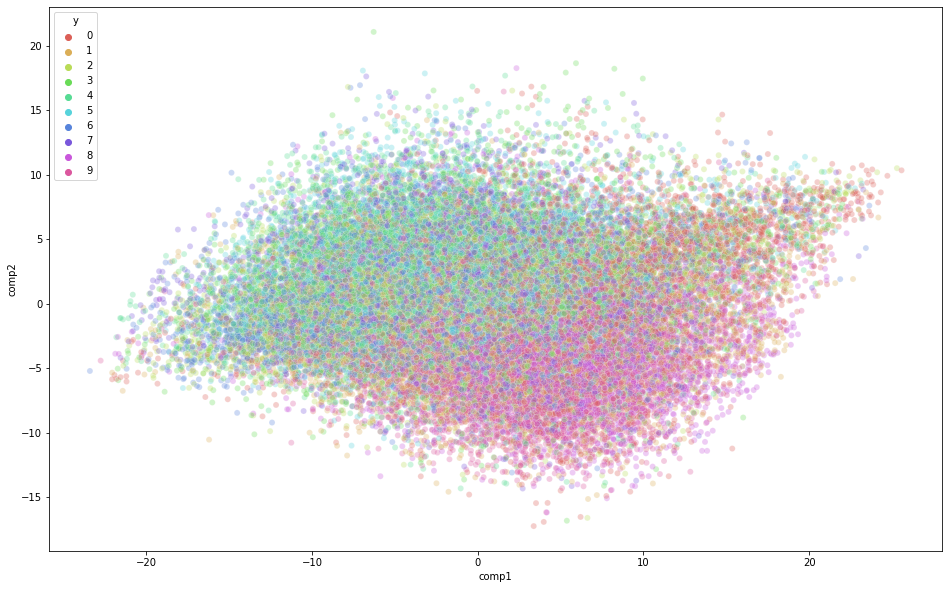

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="comp1", y="comp2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_cifar10_pca,
    legend="full",
    alpha=0.3
)

# K-NN Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = df_cifar10_pca.iloc[:,:-1].values
Y = df_cifar10_pca.iloc[:,-1].values
X.shape,Y.shape

((50000, 2), (50000,))

In [ ]:
kmeans = KMeans(n_clusters=10).fit(X)

In [ ]:
labels = kmeans.labels_

In [ ]:
X.shape, labels.shape

((50000, 2), (50000,))

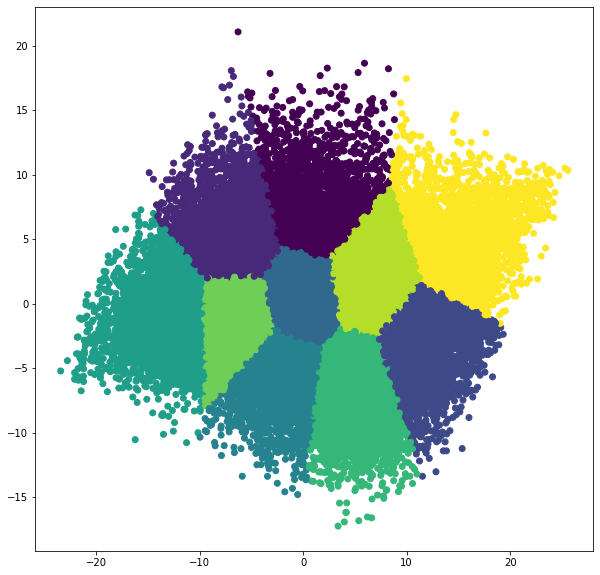

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=labels)